# Learning Lab Data Preparation

In this jupyter notebook the importance of data preperation is showcased. 

In [87]:
import numpy as np
import pandas as pd
import statistics as cal
import seaborn as sns
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, plot_confusion_matrix, confusion_matrix

## Define Butterworth filter
In this notebook a lowpass filter will be used to filter out high frequencies in the data. For the lowpass filter a fifth order Butterworth filter is used. The setting of a Butterworth filter are the Cuttoff frequency, the variable that must be filtered and the sampling frequency.

In [88]:
def lpfilter(cutoff_freq,var1,sampling_freq):
    Order = 5
    sampling_duration = len(var1)/5

    normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
    numerator_coeffs, denominator_coeffs = signal.butter(Order, normalized_cutoff_freq)
    filtered_var1 = signal.lfilter(numerator_coeffs, denominator_coeffs, var1)
    
    return filtered_var1

## Importing data from Kaggle
The data that is used in this notebook is from Kaggle.com. The data consist of phone sensor data that was collected when people were walking or running. The link to the data is https://www.kaggle.com/vmalyi/run-or-walk

In [89]:
df = pd.read_csv('dataset.csv')
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


## Dropping columns that are not needed
Not all data of the imported dataframe is needed. Some features like the time, date and user aren't important

In [90]:
df = df.drop(['date','username','time','wrist'], axis=1)
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


## Splitting data into train and test

### Train model without any operations
Before preparing data with lowpass filters or any other methodes we will set a baseline with a Decision tree model and basic inputs. To ensure every decisiontree is the same a randomstate of 6 is choosen for every decision tree.

In [91]:
data = df.values
X = data[:,1:]
y = data[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model= DecisionTreeClassifier(random_state=6)
model.fit(X_train,y_train)

Accuracy_nofilt =  model.score(X_test,y_test)
Precision_nofilt = precision_score(y_test,model.predict(X_test), average='macro')
Recall_nofilt = recall_score(y_test,model.predict(X_test), average='macro')

print("Accuracy = " + str(Accuracy_nofilt))
print("Precision = " + str(Precision_nofilt))
print("Recall = " + str(Recall_nofilt))

Accuracy = 0.9819957105768146
Precision = 0.9819908989103524
Recall = 0.9820043307146061


### Balancing of Data

/opt/jupyterhub/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='activity', ylabel='count'>

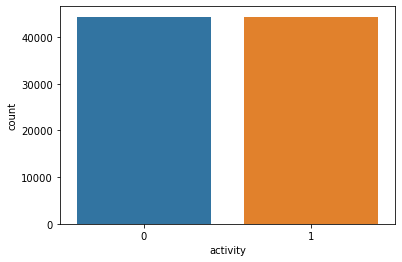

In [92]:
sns.countplot(df['activity'])

In [93]:
model= DecisionTreeClassifier(random_state=6, class_weight='balanced')
model.fit(X_train,y_train)

Accuracy_Balanc =  model.score(X_test,y_test)
Precision_Balanc = precision_score(y_test,model.predict(X_test), average='macro')
Recall_Balanc = recall_score(y_test,model.predict(X_test), average='macro')

print("Accuracy = " + str(Accuracy_Balanc))
print("Precision = " + str(Precision_Balanc))
print("Recall = " + str(Recall_Balanc))

Accuracy = 0.9823907890281071
Precision = 0.9823859992975388
Recall = 0.9823997678868472


### Train/Tune model with LP-filter
Now we will look if we can improve the Recall, Precision and accuracy with a Lowpass Filter. We will try different cuttoff frequencies and choose the best

In [94]:
Recall =[]
Precision =[]
Model_score = []
Cuttoff_freq = np.arange(0.1,2.4,0.1)

for x in Cuttoff_freq:
    df.gyro_y = lpfilter(x,df.gyro_y,5)
    data = df.values
    X = data[:,1:]
    y = data[:,0]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    model= DecisionTreeClassifier(random_state=6)
    model.fit(X_train,y_train)
    Recall.append(recall_score(y_test,model.predict(X_test), average='macro'))
    Precision.append(precision_score(y_test,model.predict(X_test), average='macro'))
    Model_score.append(model.score(X_test,y_test))

## Validate Results

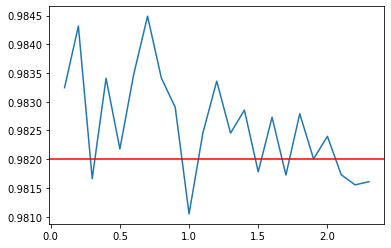

In [95]:
plt.plot(Cuttoff_freq,Recall)
plt.axhline(y=Recall_nofilt, color='r')
plt.show()

In [96]:
Recall_max = max(Recall)
Cuttoff_max = Cuttoff_freq[Recall.index(Recall_max)]
Accuracy_lp = Model_score[Recall.index(Recall_max)]

print("Accuracy = " + str(Model_max))
print("Best Recall = " + str(Recall_max))
print("Cuttof frequency = " + str(Cuttoff_max))

Accuracy = 0.9844790608420815
Best Recall = 0.9844877732523614
Cuttof frequency = 0.7000000000000001


# Mathematical functions to support your data
Re-import the data

In [97]:
df = pd.read_csv('dataset.csv')
df = df.drop(['date','username','time','wrist'], axis=1)

Mathematical functions like dividing or the sum of different features can be used to improve the accuracy of a model. Also a differential equation can support your model

In [98]:
df['Sum'] = df.acceleration_z*df.gyro_z
df['Diff'] = np.insert(np.diff(df.gyro_z,n=1),0,0)

## Validate Results

In [99]:
data = df.values
X = data[:,1:]
y = data[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model= DecisionTreeClassifier(random_state=6)
model.fit(X_train,y_train)
Accuracy_math = model.score(X_test,y_test)


Accuracy_Math =  model.score(X_test,y_test)
Precision_Math = precision_score(y_test,model.predict(X_test), average='macro')
Recall_Math = recall_score(y_test,model.predict(X_test), average='macro')

print("Accuracy = " + str(Accuracy_Math))
print("Precision = " + str(Precision_Math))
print("Recall = " + str(Recall_Math))

Accuracy = 0.9862851337622757
Precision = 0.9862813674573839
Recall = 0.9862980417746334


# Compare results
Compare the results of the lowpass filter, Mathematical Functions and normal

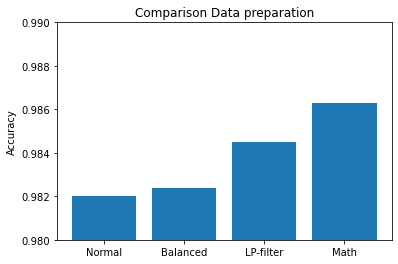

In [100]:
plt.bar(['Normal','Balanced','LP-filter','Math'],[Accuracy_nofilt,Accuracy_Balanc,Accuracy_lp,Accuracy_math])
plt.ylim(0.98,0.99)
plt.ylabel('Accuracy')
plt.title('Comparison Data preparation')
plt.show()

# Can you do better?

Can you get a better accuracy with just data preperation on this dataset? 
Email your results before friday this week to 18094627@student.hhs.nl.
Winner of the challenge gets a free beer!!!